# Understanding NonLinearity in Deep Neural Network

In [71]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris
import seaborn as sns
from drawdata import draw_scatter
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [104]:
data= load_iris()

In [105]:
# list(data.feature_names),list(data.target_names), data

In [106]:
x_data= data.data
y_data=data.target.reshape((-1,1))
x_data.shape, y_data.shape

((150, 4), (150, 1))

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_sc= sc.fit_transform(x_data)



In [99]:
def f1(x):# its a near function
    bias=10
    slope= 2
    return 3*x+bias
def f2(x):# its a near function
    bias=10
    slope= 2
    return 2*x+bias
def sigmoid(x):
    return 1 / (1 + np.exp(-1.0 * x))
def relu(x):
    r=[]
    for v in x:
        if v>0:
            r.append(v)
        else:
            r.append(0)
    return np.array(r)
def relu1(x):
    r=[]
    for v in x:
        if 0<v<15:
            r.append(v+10)
        elif v>10:
            r.append(-10)
        else: 
            r.append(100)
        
    return np.array(r)


(-50.0, 100.0)

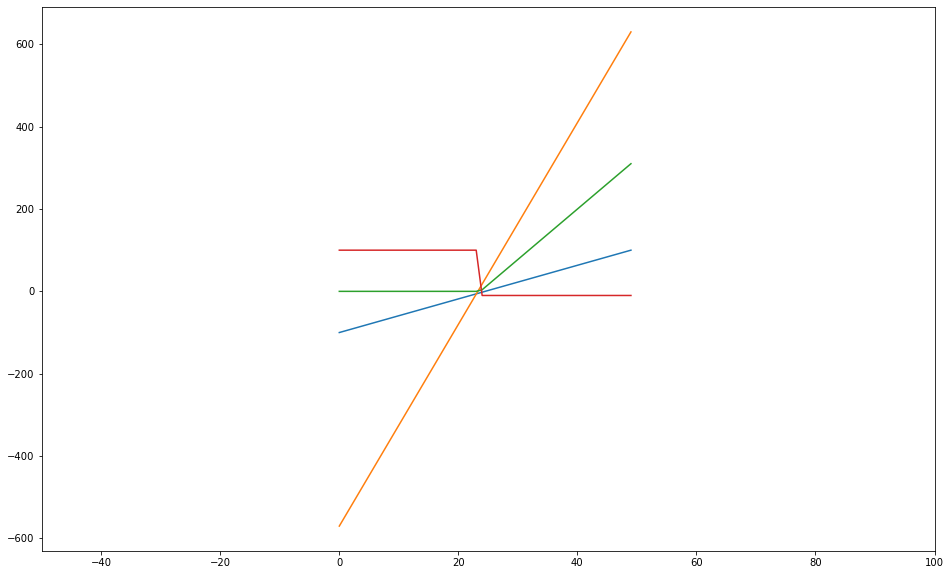

In [100]:
x= np.linspace(-100,100)
y= np.linspace(-100,100)
plt.figure(figsize=(16,10))
plt.plot(x) # blue
plt.plot(f2(f1(x))) # orange
plt.plot(relu(f1(x))) # green
plt.plot(relu1(f2((f1(x)))))
plt.xlim(-50,100)

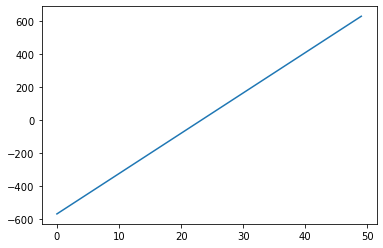

In [86]:
plt.plot(f2(f1(x))) #f(f(x)) neural network is kind of function of function
# here I want to say that linear multiplication with linear function result in linear result 

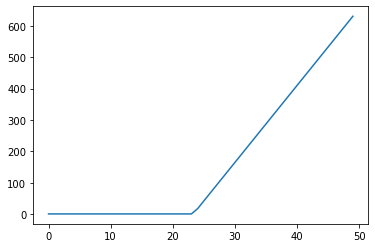

In [58]:
plt.plot(relu(f2(f1(x))))

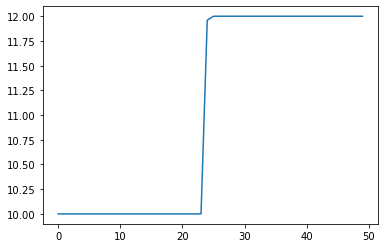

In [59]:
plt.plot(f2(sigmoid(f1(x))))

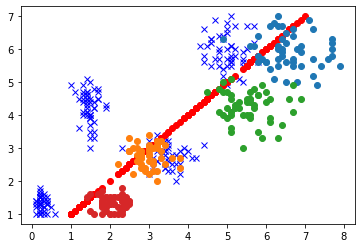

In [141]:
plt.plot(x_data[y_data[:,0]==0],x_data[y_data[:,0]==1],'bx')
plt.plot(x_data[y_data[:,0]==1],x_data[y_data[:,0]==1],'ro')
plt.plot(x_data[y_data[:,0]==2],x_data[y_data[:,0]==1],'o')

In [135]:
y_data[:,0]==2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [2]:
draw_scatter()

In [5]:
df= pd.read_clipboard(sep=",")

In [210]:
df['target']=df['z'].apply(lambda row: 1 if row== 'a' else '0')
df =df.sample(frac=1)

<AxesSubplot:xlabel='x', ylabel='y'>

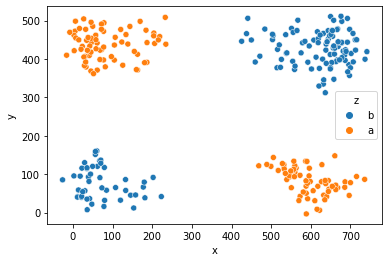

In [211]:
sns.scatterplot(data=df, x='x',y='y',hue='z')


In [254]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(2, trainable=True)(inputs)
outputs = tf.keras.layers.Dense(1)(x)
model_noa = tf.keras.Model(inputs=inputs, outputs=outputs)
model_noa.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_noa.summary()

Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_98 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [255]:
x_train=df[['x','y']]
y_train= df['target']
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.int32).reshape((-1,1))

    
x_train.shape,y_train.shape

((288, 2), (288, 1))

In [256]:
model_noa.fit(x_train,y_train,batch_size = 4, epochs=100)

Epoch 1/100
72/72 [==============================] - 0s 4ms/step - loss: 8.2642 - accuracy: 0.4583
Epoch 2/100
72/72 [==============================] - 0s 4ms/step - loss: 8.1559 - accuracy: 0.4653
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 8.1559 - accuracy: 0.4653
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 8.1559 - accuracy: 0.4653
Epoch 5/100
72/72 [==============================] - 0s 4ms/step - loss: 8.1559 - accuracy: 0.4653
Epoch 6/100
72/72 [==============================] - 0s 4ms/step - loss: 8.1559 - accuracy: 0.4653
Epoch 7/100
72/72 [==============================] - 0s 4ms/step - loss: 8.1559 - accuracy: 0.4653
Epoch 8/100
72/72 [==============================] - 0s 4ms/step - loss: 8.1559 - accuracy: 0.4653
Epoch 9/100
72/72 [==============================] - 0s 5ms/step - loss: 8.1559 - accuracy: 0.4653
Epoch 10/100
72/72 [==============================] - 0s 4ms/step - loss: 8.1559 - accuracy: 0.4653
Epoch 11/

In [257]:
pred_noa=model_noa.predict(x_train)
pred_noa=pred_noa.squeeze()

<AxesSubplot:ylabel='y'>

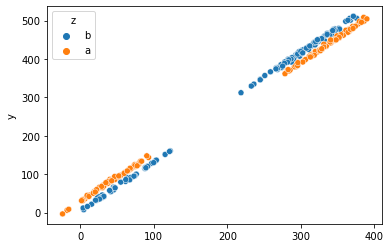

In [258]:
sns.scatterplot(data=df, x=pred_noa,y='y',hue='z')

In [259]:
inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(2,activation=tf.nn.tanh, trainable=True)(inputs)
outputs = tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_100 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [260]:
model.fit(x_train,y_train,batch_size = 4,epochs=100,verbose=1)

Epoch 1/100
72/72 [==============================] - 0s 5ms/step - loss: 0.7659 - accuracy: 0.4757
Epoch 2/100
72/72 [==============================] - 0s 5ms/step - loss: 0.7315 - accuracy: 0.4757
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 0.7035 - accuracy: 0.4757
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.4757
Epoch 5/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.4757
Epoch 6/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.4757
Epoch 7/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6407 - accuracy: 0.4757
Epoch 8/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6334 - accuracy: 0.5729
Epoch 9/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.6597
Epoch 10/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.6597
Epoch 11/

In [261]:
pred=model.predict(x_train)
pred=pred.squeeze()

<AxesSubplot:ylabel='y'>

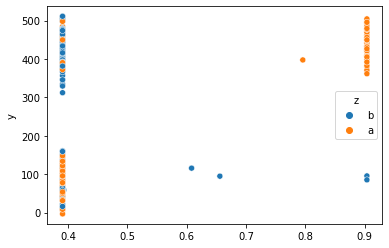

In [262]:
sns.scatterplot(data=df, x=pred,y='y',hue='z')